[View in Colaboratory](https://colab.research.google.com/github/jasonrwang/ghg_analytics/blob/master/ghg_analytics.ipynb)

# ghg_analytics
## Insights into trends with global greenhouse gases and climate change action.

### Authors:
* Aashna Mittal
* Gamze Ünlü
* Jason R Wang

In [149]:
#library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import NaN
plt.style.use('ggplot')

## Data Cleaning

In [67]:
#Import data on Greenhouse Gases
GreenhouseGasesOriginalDf = pd.read_csv("Data Sources/GreenhouseGasData.csv", sep=',', skipinitialspace=True, skiprows=4) 
#print("Original dataframe...\n", GreenhouseGasesOriginalDf.head(10))

#Drop the indicator name and indicator code as the values are same across the whole dataframe
GreenhouseGasesDf = GreenhouseGasesOriginalDf.drop(["Indicator Code", "Indicator Name"], axis = 1)

#Drop all the columns that contain only null values
GreenhouseGasesDf.dropna(axis = 1, how="all", inplace=True)  

#Drop all the rows that contain only null values, starting from column 2
GreenhouseGasesDf.dropna(axis = 0, how="all", subset = GreenhouseGasesDf.columns[2:], inplace= True)  

#First interpolate missing values and then use backfill to fill starting NA values of a row
GreenhouseGasesDf.iloc[:,2:] = GreenhouseGasesDf.iloc[:,2:].interpolate(axis = 1).bfill(axis=1)

GreenhouseGasesDf.head()

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,42.306298,42.786948,43.286613,43.724590,44.130957,44.481908,131.633746,135.055319,...,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02,6.169287e+02
1,Afghanistan,AFG,14306.616300,14391.778200,13040.848000,13535.754100,14945.968200,14574.164000,14746.851000,15247.281000,...,1.470988e+04,1.465437e+04,1.477026e+04,1.484916e+04,1.527263e+04,1.528878e+04,1.555443e+04,1.779133e+04,1.798131e+04,1.816886e+04
2,Angola,AGO,60648.601080,39162.171430,42205.650700,44252.669120,40179.233500,44429.300030,38448.024090,43563.412180,...,3.585801e+04,3.686023e+04,3.585574e+04,3.637582e+04,3.669053e+04,3.739629e+04,3.830947e+04,4.002939e+04,4.087865e+04,4.165716e+04
3,Albania,ALB,6960.868200,6950.036100,7613.266100,7348.492100,7632.664300,7873.037000,8470.978400,8948.980900,...,7.834016e+03,7.401102e+03,8.308386e+03,8.027150e+03,9.879394e+03,8.136785e+03,8.108812e+03,8.506996e+03,8.712296e+03,8.898641e+03
5,Arab World,ARB,552362.062026,576946.152269,625015.943839,699280.217253,679448.005841,683966.235399,775863.729505,799971.040800,...,1.963193e+06,1.660587e+06,1.767879e+06,1.731289e+06,2.355481e+06,2.364089e+06,2.387502e+06,1.924245e+06,2.483349e+06,1.908696e+06


In [108]:
#Import the dataframe which contains the codes of country group aggregates
CountryGroupCodes = pd.read_excel("Data sources/CountryGroups.xls", sheet = "Groups", skiprows=226, header = None)
CountryGroupCodes.dropna(how="all", inplace=True, axis=1)
CountryGroupCodes.drop(columns=0,inplace=True)
CountryGroupCodes.dropna(how="all", inplace=True, axis=0)
CountryGroupCodes.columns = ["Aggregate Name", "Aggregate Code"]
CountryGroupCodes

#Drop the rows corresponding to aggregate country codes from existing dataframe to create a new country dataframe 
GreenhouseGasesCountryDf = GreenhouseGasesDf[GreenhouseGasesDf["Country Code"].apply(lambda x: False if x in CountryGroupCodes["Aggregate Code"].values else True)]


,Aggregate Name,Aggregate Code
0,Arab World,ARB
1,Caribbean small states,CSS
2,Central Europe and the Baltics,CEB
3,Early-demographic dividend,EAR
4,East Asia & Pacific,EAS
5,East Asia & Pacific (excluding high income),EAP
6,East Asia & Pacific (IDA & IBRD),TEA
7,Euro area,EMU
8,Europe & Central Asia,ECS
9,Europe & Central Asia (excluding high income),ECA


## Data visualization

Text(0,0.5,'GreenHouse Emission [Kt CO2]')

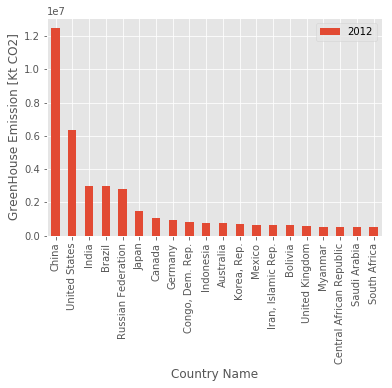

In [114]:
#Sorted bar chart of 2012 greenhouse gases

GreenhouseGasesCountryDf.sort_values(by="2012", ascending=False)[["Country Name", "2012"]]

GreenhouseGasesTop20Emitters = GreenhouseGasesCountryDf.sort_values(by = "2012", ascending = False).iloc[:20,:]

GreenhouseGasesTop20Emitters[["Country Name", "2012"]].plot(x = "Country Name", kind="bar")

plt.ylabel("GreenHouse Emission [Kt CO2]")